# Example of 1d plots

This is an example of how the new postel should work


## Plot a field evolution at several nodes

Simple plot of the value of the points below water depth over time

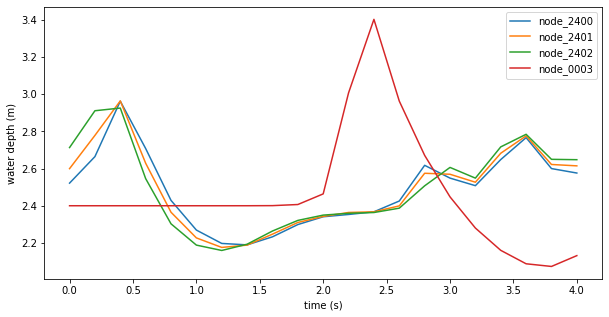

In [1]:
from os import chdir, environ, path
import matplotlib.pyplot as plt
from postel.plot1d import plot1d
from data_manip.extraction.telemac_file import TelemacFile

chdir(path.join(environ['HOMETEL'], 'examples', 'telemac2d', 'gouttedo'))

res = TelemacFile('f2d_gouttedo.slf')

# Getting array of time values from file 
times = res.times

# List of nodes we what to display
nodes = [2400, 2401, 2402, 3]

# Getting water depth values over time for each node in nodes
data = res.get_timeseries_on_nodes('WATER DEPTH', nodes)

#Initialising figure
fig, ax = plt.subplots(figsize=(10,5))

# for each plot adding a history plot with a label node_(node_number)
for i, node in enumerate(nodes):
     plot1d(ax, times, data[i,:],
            plot_label='node_{:04d}'.format(node),
            x_label='time (s)',
            y_label='water depth (m)')

# Displaying legend
ax.legend()

#Showing figure
plt.show()

del plt
del res

## Plot a field evolution at several points (and not mesh nodes) for telemac-2d result

Simple plot of water depth for several points over time

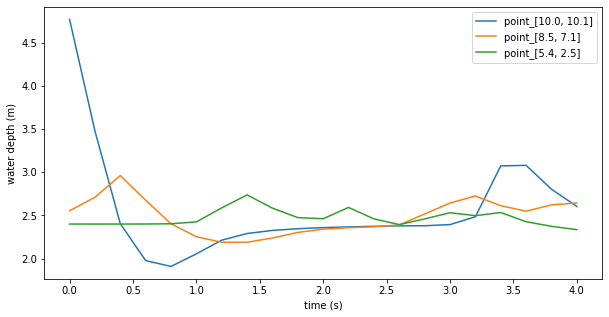

In [2]:
from os import chdir, environ, path
import matplotlib.pyplot as plt
from postel.plot1d import plot1d
from data_manip.extraction.telemac_file import TelemacFile
import numpy as np

file_name = path.join(environ['HOMETEL'], 
                          'examples', 
                          'telemac2d', 
                          'gouttedo',
                          'f2d_gouttedo.slf')

res = TelemacFile(file_name)

# Getting array of time values from file 
times = res.times

# List of points we what to display
points = [[10.0,10.1], [8.5,7.1], [5.4,2.5]]

# Getting water depth values over time for each point of extraction
data = res.get_timeseries_on_points('WATER DEPTH', points)

#Initialising figure
fig, ax = plt.subplots(figsize=(10,5))

# for each plot adding a history plot with a label node_(node_number)
for i, point in enumerate(points):
     plot1d(ax, times, data[i,:], 
            x_label='time (s)',
            y_label='water depth (m)', 
            plot_label='point_{}'.format(point))

# Displaying legend
ax.legend()

#Showing figure
plt.show()

del plt
del res

## Plot a field evolution at several points (and not mesh nodes) for telemac-3d result

Simple plot of elevation for several points over time

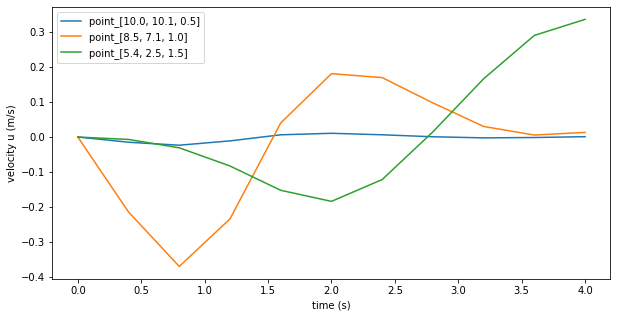

In [3]:
from os import chdir, environ, path
import matplotlib.pyplot as plt
from postel.plot1d import plot1d
from data_manip.extraction.telemac_file import TelemacFile
import numpy as np

file_name = path.join(environ['HOMETEL'], 
                          'notebooks', 
                          'data', 
                          'r3d_gouttedo.slf')

res = TelemacFile(file_name)

# Getting array of time values from file 
times = res.times

# List of points we what to display
points = [[10.0,10.1,0.5], [8.5,7.1,1.], [5.4,2.5,1.5]]

# Getting elevation values over time for each point of extraction
data = res.get_timeseries_on_points('VELOCITY U', points)


#Initialising figure
fig, ax = plt.subplots(figsize=(10,5))

# for each plot adding a history plot with a label node_(node_number)
for i, point in enumerate(points):
     plot1d(ax, times, data[i,:], 
            x_label='time (s)',
            y_label='velocity u (m/s)', 
            plot_label='point_{}'.format(point))

# Displaying legend
ax.legend()

#Showing figure
plt.show()

del plt
del res

## Plot with datetimes units instead of seconds

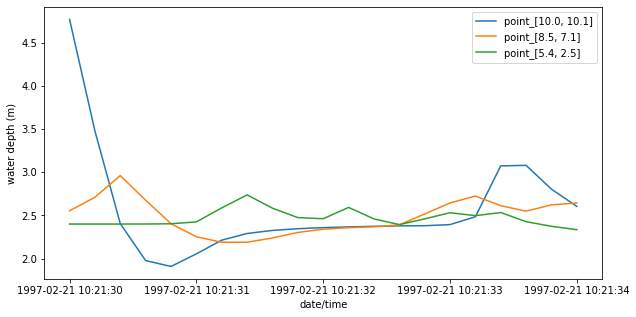

In [4]:
from os import chdir, environ, path
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from postel.plot1d import plot1d
from data_manip.extraction.telemac_file import TelemacFile
from data_manip.computation.datetimes import compute_datetimes
import numpy as np

file_name = path.join(environ['HOMETEL'], 
                          'examples', 
                          'telemac2d', 
                          'gouttedo',
                          'f2d_gouttedo.slf')

res = TelemacFile(file_name)

# Getting array of datetime
datetimes = compute_datetimes(res.times, initial_date=res.datetime)

# Custom initial date can be set:
#datetimes = compute_datetimes(res.times, initial_date='2019/01/01 00:00:00')

# List of points we what to display
points = [[10.0,10.1],[8.5,7.1],[5.4,2.5]]

# Getting water depth values over time for each node in nodes
data = res.get_timeseries_on_points('WATER DEPTH', points)

#Initialising figure
fig, ax = plt.subplots(figsize=(10,5))

# for each plot adding a history plot with a label node_(node_number)
for i, point in enumerate(points):
     plot1d(ax, datetimes, data[i,:], 
            x_label='date/time',
            y_label='water depth (m)', 
            plot_label='point_{}'.format(point))

# Displaying legend
ax.legend()

# X-axis datetimes format
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
#plt.gcf().autofmt_xdate()

#Showing figure
plt.show()

del plt
del res

## Extract water depth evolution along a polyline and plot one time frame 

Extract the water depth evolution along a polyline and plot the initial water depth condition.

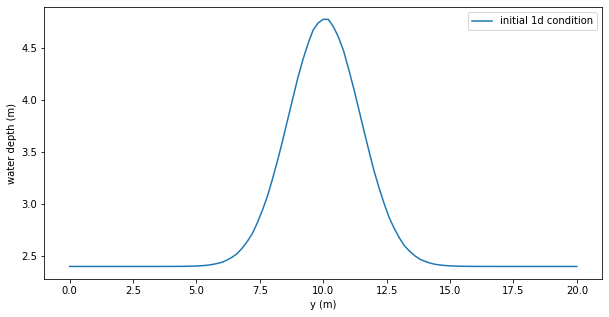

In [5]:
from os import chdir, environ, path
import matplotlib.pyplot as plt
from postel.plot1d import plot1d
from data_manip.extraction.telemac_file import TelemacFile
import numpy as np

file_name = path.join(environ['HOMETEL'], 
                          'examples', 
                          'telemac2d', 
                          'gouttedo',
                          'f2d_gouttedo.slf')

res = TelemacFile(file_name)

# List of points defining the polyline
poly_points = [[10.0,0.0], [10.0,5.0], [10.0,15.0], [10.0,20.0]]

# List of number of discretized points for each polyline segment
poly_number =[10, 50, 10]

# Getting water depth values over time for each discretized points of the polyline
poly_coord, abs_curv,values_polylines=res.get_timeseries_on_polyline('WATER DEPTH', poly_points, poly_number)

#Initialising figure
fig, ax = plt.subplots(figsize=(10,5))

# plot over the polyline of the initial condition
plot1d(ax, abs_curv,values_polylines[:,0], 
       x_label='y (m)',
       y_label='water depth (m)', 
       plot_label='initial 1d condition')

# Displaying legend
ax.legend()

#Showing figure
plt.show()

del plt
del res

## Extract velocity U along a vertical line and plot one time frame 

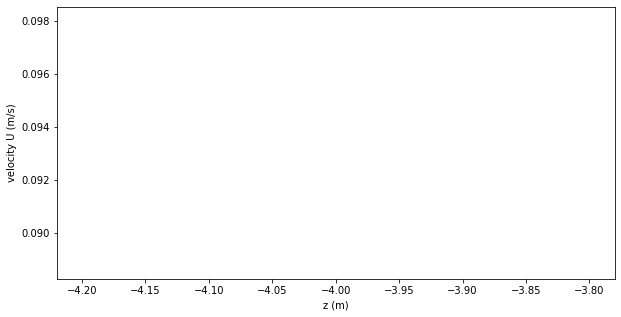

In [6]:
from os import environ, path
from data_manip.extraction.telemac_file import TelemacFile
import matplotlib.pyplot as plt
from postel.plot1d import plot1d
import numpy as np
from data_manip.computation.triangulation import triangulation_from_data

# File we are going to use
file_name = path.join(environ['HOMETEL'], 
                      'examples', 
                      'telemac3d', 
                      'lock-exchange',
                      'f3d_lock-exchange.slf')

# Opening the file with TelemacFile
res = TelemacFile(file_name)

# 2d point where you want the vertical extraction
points_to_extract = [15.0,0.6]

# time serie extraction of elevation variable
timeseries_Z = \
res.get_timeseries_on_vertical_segment('ELEVATION Z', points_to_extract)

# time serie extraction of elevation variable
timeseries_vel = \
res.get_timeseries_on_vertical_segment('VELOCITY U', points_to_extract)

#Initialising figure
fig, ax = plt.subplots(figsize=(10,5))

# plot over the polyline of the initial state
plot1d(ax, timeseries_Z[0,:], timeseries_vel[0,:], 
       x_label='z (m)',
       y_label='velocity U (m/s)')

# Showing the plot
plt.show()

# Closing file
del plt
del res